In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wave
import sys
from scipy.io.wavfile import write
%matplotlib inline

In [35]:
spf = wave.open('../datasets/deeplearning.wav', 'r')

In [36]:
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print("numpy signal:", signal.shape)

numpy signal: (317312,)


/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app


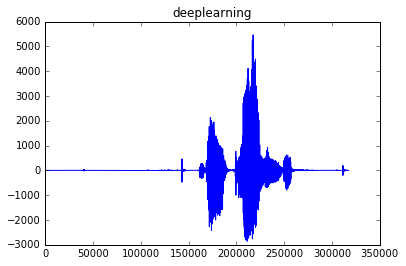

In [37]:
plt.plot(signal)
plt.title("deeplearning")
plt.show()

In [38]:
delta = np.array([1., 0., 0.])
noecho = np.convolve(signal, delta)
print("noecho signal:", noecho.shape)

noecho signal: (317314,)


In [39]:
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

In [40]:
noecho = noecho.astype(np.int16) 
write('../datasets/noecho.wav', 16000, noecho)

filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt)

out = out.astype(np.int16) 
write('../datasets/out.wav', 16000, out)